# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

---
### Observable Trends

* The cities that are closer to the equator have higher maximum temperature than cities that are farther away from the equator. This is in line with common knowledge that the temperature around it is high. (The equator is when the latitude is equal to 0 degrees.)

* There is no clear correlation between cloudiness and latitude, nor between humidity and latitude. As shown in the charts, there can be various percentages of cloudiness or humidity at a certain latitutde. 

* In the "Latitude vs Wind Speed" chart, the majority of the points are located in the range of 0 mph to 20 mph. This is valid for across all latitutes.  

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime as dt
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [25]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

In [26]:
print(cities)

['kamuli', 'hamilton', 'barentsburg', 'bredasdorp', 'sitka', 'ushuaia', 'aksarka', 'urdzhar', 'geraldton', 'soller', 'taolanaro', 'cidreira', 'pevek', 'jamestown', 'nizhneyansk', 'butaritari', 'beba', 'hilo', 'samusu', 'bahia blanca', 'punta arenas', 'yaan', 'severo-kurilsk', 'halifax', 'nhulunbuy', 'hermanus', 'albany', 'gua musang', 'kodiak', 'lompoc', 'carnarvon', 'hithadhoo', 'baglung', 'qazvin', 'busselton', 'norman wells', 'fez', 'sobolevo', 'hobart', 'mercedes', 'kindu', 'upernavik', 'zhigansk', 'lebu', 'bluff', 'olafsvik', 'yellowknife', 'mareeba', 'rikitea', 'saint anthony', 'clyde river', 'thompson', 'kathu', 'puerto ayora', 'isangel', 'souris', 'toora-khem', 'belaya gora', 'tuggurt', 'katobu', 'chokurdakh', 'saskylakh', 'quimper', 'barrow', 'qui nhon', 'tanout', 'gat', 'cayenne', 'bathsheba', 'praia da vitoria', 'attawapiskat', 'constitucion', 'whitianga', 'cockburn town', 'mar del plata', 'tlahuelilpan', 'grimshaw', 'amuntai', 'tasiilaq', 'kavaratti', 'grand haven', 'neiafu

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [27]:
units = "imperial"
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={api_key}&units={units}&q="
#print(query_url)

In [28]:
#Create empty lists to append the API data
citylist = []
countrynamelist = []
datelist = []
latlist = []
longlist=[]
maxtemplist = []
humiditylist = []
cloudinesslist = []
windspeedlist = []

#Initiate counters for log
totalrecordcount = 0
recordcount = 0
setcount = 1 

#Set date
now = dt.datetime.today()
date_strformat = now.strftime("%Y-%m-%d")

# Print statement of the log file
print("Beginning Data Retrieval")
print("---------------------------")

for cityname in cities: 

    totalrecordcount = totalrecordcount + 1
    
    if totalrecordcount % 50 == 0: 
        setcount = setcount + 1
        recordcount = 0
            
    recordcount = recordcount + 1
    
    #Error/exception handling when city generated by CitiPy is not found in OpenWeatherMap

    try:
        # Response of the query
        weather_json = requests.get(query_url+cityname).json()
        
        #pprint(weather_json)
        
        # Appending data to list 
        citylist.append(weather_json["name"])
        countrynamelist.append(weather_json["sys"]["country"])
        datelist.append(weather_json["dt"])
        latlist.append(weather_json["coord"]["lat"])
        longlist.append(weather_json["coord"]["lon"])
        maxtemplist.append(weather_json["main"]["temp_max"])
        humiditylist.append(weather_json["main"]["humidity"])
        cloudinesslist.append(weather_json["clouds"]["all"])
        windspeedlist.append(weather_json["wind"]["speed"])
        
        # Get city name for counter
        cityname_counter = weather_json["name"]
        
        print(f"Processing Record {recordcount} of Set {setcount} | {cityname_counter}")
        
    # Skip to the next call when city is not found
    except: 
        print(f"City {cityname} was not found. Skipping...")
    continue


Beginning Data Retrieval
---------------------------
Processing Record 1 of Set 1 | Kamuli
Processing Record 2 of Set 1 | Hamilton
City barentsburg was not found. Skipping...
Processing Record 4 of Set 1 | Bredasdorp
Processing Record 5 of Set 1 | Sitka
Processing Record 6 of Set 1 | Ushuaia
Processing Record 7 of Set 1 | Aksarka
City urdzhar was not found. Skipping...
Processing Record 9 of Set 1 | Geraldton
Processing Record 10 of Set 1 | Soller
City taolanaro was not found. Skipping...
Processing Record 12 of Set 1 | Cidreira
Processing Record 13 of Set 1 | Pevek
Processing Record 14 of Set 1 | Jamestown
City nizhneyansk was not found. Skipping...
Processing Record 16 of Set 1 | Butaritari
Processing Record 17 of Set 1 | Beba
Processing Record 18 of Set 1 | Hilo
City samusu was not found. Skipping...
Processing Record 20 of Set 1 | Bahia Blanca
Processing Record 21 of Set 1 | Punta Arenas
Processing Record 22 of Set 1 | Yaan
Processing Record 23 of Set 1 | Severo-Kurilsk
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [29]:
# Create a dictionary with the generated lists

dict_weatherpy = {
    "City":citylist, 
    "Cloudiness": cloudinesslist,
    "Country": countrynamelist, 
    "Date": datelist, 
    "Humidity": humiditylist,
    "Lat": latlist, 
    "Lng": longlist, 
    "Max Temp": maxtemplist, 
    "Wind Speed": windspeedlist , 
}

# Create a data frame from the dictionary above
df_weatherpy = pd.DataFrame(dict_weatherpy)

# Show count of entries in each key of dictionary
df_weatherpy.count()

City          559
Cloudiness    559
Country       559
Date          559
Humidity      559
Lat           559
Lng           559
Max Temp      559
Wind Speed    559
dtype: int64

In [30]:
# Save data frame as a .csv file
df_weatherpy.to_csv("../CSV_output/weatherpy_data.csv")

# Display first 5 rows of data frame
df_weatherpy.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Kamuli,85,UG,1555690034,50,0.94,33.12,84.29,2.15
1,Hamilton,20,BM,1555689663,60,32.30,-64.78,72.00,12.75
2,Bredasdorp,100,ZA,1555689643,23,-34.53,20.04,73.40,11.41
3,Sitka,0,US,1555689680,48,37.17,-99.65,55.00,5.99
4,Ushuaia,75,AR,1555686000,81,-54.81,-68.31,46.40,32.21


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

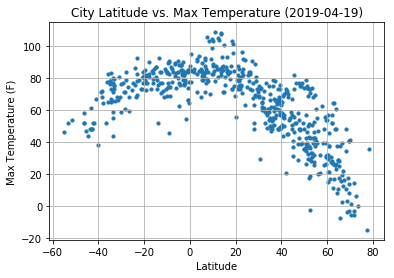

In [31]:
#Create a scatter plot for Lat and Temp
plt.scatter(df_weatherpy["Lat"], df_weatherpy["Max Temp"], marker="o", s=10)

#Format the chart --- ADD THE DATE from TIME Module
plt.title(f"City Latitude vs. Max Temperature ({date_strformat})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

#Save the chart
plt.savefig("../Images/Latitude_vs_Max_Temp.png")

#Show plot
plt.show()

#### Latitude vs. Humidity Plot

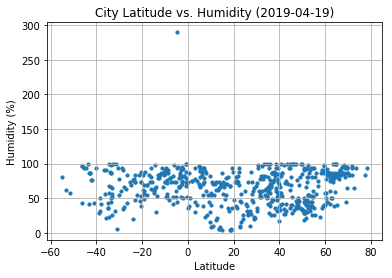

In [32]:
#Create a scatter plot for Lat and Humidity
plt.scatter(df_weatherpy["Lat"],df_weatherpy["Humidity"], marker = 'o', s=10)

#Format the chart
plt.title(f"City Latitude vs. Humidity ({date_strformat})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

#Save the chart
plt.savefig("../Images/Latitude_vs_Humidity.png")

#Show the chart
plt.show()


#### Latitude vs. Cloudiness Plot

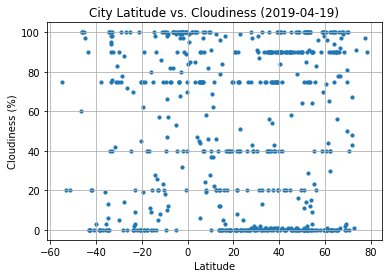

In [33]:
#Create a scatter plot for Lat and Humidity
plt.scatter(df_weatherpy["Lat"],df_weatherpy["Cloudiness"], marker = 'o', s=10)

#Format the chart
plt.title(f"City Latitude vs. Cloudiness ({date_strformat})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

#Save the chart
plt.savefig("../Images/Latitude_vs_Cloudiness.png")

#Show the chart
plt.show()


#### Latitude vs. Wind Speed Plot

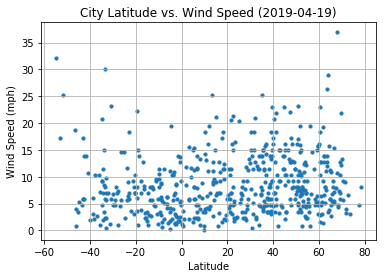

In [34]:
#Create a scatter plot for Lat and Humidity
plt.scatter(df_weatherpy["Lat"],df_weatherpy["Wind Speed"], marker = 'o', s=10)

#Format the chart
plt.title(f"City Latitude vs. Wind Speed ({date_strformat})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

#Save the chart
plt.savefig("../Images/Latitude_vs_WindSpeed.png")

#Show the chart
plt.show()
